In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
# Wavefunction generation
from scf_runs import run_lda_he
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1


In [3]:
import importlib, recipes, linemin, sample_many
modules = [recipes, linemin, sample_many]
for m in modules:
    importlib.reload(m)


for fname in ['sj.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")

recipes.OPTIMIZE(scf_checkfile, "sj.hdf5", 
                 max_iterations=6, 
                 nconfig=10000, 
                 verbose=True,
                 # jastrow_kws={"ion_cusp":False}
                )

# Jastrow optimization results
df = recipes.read_opt("sj.hdf5")

# with h5py.File("sj.hdf5") as f:
#     print("keys", list(f.keys()))
#     print("wave function parameters", list(f['wf'].keys()))
#     ee_j = f['energy'][...]   
#     x = f['x'][...]
#     yfit = f['yfit'][...]
#     # pgrad = f['pgradient'][...]   
#     print(f['wf/wf2acoeff'][()])
#     print(f['wf/wf2bcoeff'][()])



RUNNING VMC OPTIMIZATION
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.6402061813704033
Dot product between gradient and SR step:  0.8857428311224997
descent en -2.7796901971761776 0.003927243216506444
energies from correlated sampling [-2.49330498 -2.70235694 -2.82525187 -2.88435531 -2.89712163]
----------vmc done
Gradient norm:  0.12924822625026727
Dot product between gradient and SR step:  0.9364350577450229
descent en -2.882593844674935 0.00217052922364172
energies from correlated sampling [-2.85961648 -2.87026516 -2.8793487  -2.88676323 -2.89240039]
----------vmc done
Gradient norm:  0.03175170156586492
Dot product between gradient and SR step:  0.9977578409646104
descent en -2.8936805569453146 0.0014675832455771861
energies from correlated sampling [-2.88817861 -2.88921482 -2.89018658 -2.89109426 -2.89193822]
----------vmc done
Gradient norm:  0.02495599682626645
Dot product between gradient and SR step:  0.9787727132183717
descent en -2.8927156579677415 0.

In [4]:
df

,energy,iteration,error,fname
0,-2.783119,0,0.003694,sj.hdf5
1,-2.881499,1,0.002342,sj.hdf5
2,-2.892254,2,0.002256,sj.hdf5
3,-2.888977,3,0.001058,sj.hdf5
4,-2.894943,4,0.001445,sj.hdf5
5,-2.893874,5,0.001391,sj.hdf5


In [29]:
import wftools, bosonrecipes, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools
modules = [bosonrecipes,wftools, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools]
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
abvmc_file = 'abvmc-j-he_single.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION")

nblocks = 100
nsteps_per_block = 10
tstep=0.3
nconfig=1000
bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                  abvmc_file, 
                  max_iterations=6, 
                  verbose=True,  
                  # nblocks=nblocks, 
                  # nsteps_per_block=nsteps_per_block,
                  # tstep= tstep, 
                  nconfig=nconfig)
recipes.read_opt(abvmc_file)

RUNNING ABVMC OPTIMIZATION
Number of determinants in the bosonic wavefunction= 1
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.7150398777178327
Dot product between gradient and SR step:  0.8879224231447168
descent en -2.74383325283494 0.019032315012555125
energies from correlated sampling [-2.48321035 -2.73735967 -2.87167969 -2.92341439 -2.91966708]
----------vmc done
Gradient norm:  0.12926983454780347
Dot product between gradient and SR step:  0.9442155924859313
descent en -2.8791765348925 0.01435452067387927
energies from correlated sampling [-2.90178343 -2.91476219 -2.9262207  -2.93605603 -2.94415764]
----------vmc done
Gradient norm:  0.058623930098083345
Dot product between gradient and SR step:  0.9307851136592198
descent en -2.9104145003452198 0.011270981762006289
energies from correlated sampling [-2.91010213 -2.91072156 -2.91104873 -2.91107639 -2.9107971 ]
----------vmc done
Gradient norm:  0.03640044487741948
Dot product between g

,energy,iteration,error,fname
0,-2.743833,0,0.019032,abvmc-j-he_single.hdf5
1,-2.879177,1,0.014355,abvmc-j-he_single.hdf5
2,-2.910415,2,0.011271,abvmc-j-he_single.hdf5
3,-2.897336,3,0.009409,abvmc-j-he_single.hdf5
4,-2.904994,4,0.008671,abvmc-j-he_single.hdf5
5,-2.872989,5,0.012392,abvmc-j-he_single.hdf5


keys ['SRdot', 'configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'pgrad', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 2.          2.        ]
  [ 0.06768347  0.0714466 ]
  [ 0.10468779  0.10680325]
  [-0.02164315 -0.04446537]
  [-0.30495139 -0.35147991]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.0417343   0.        ]
 [ 0.         -0.18218826  0.        ]
 [ 0.         -0.21437406  0.        ]]


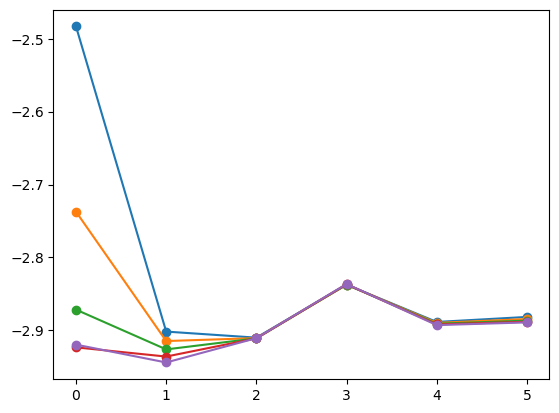

In [32]:
with h5py.File(abvmc_file) as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    # pgrad = f['pgradient'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


Text(0, 0.5, 'Partial gradients')

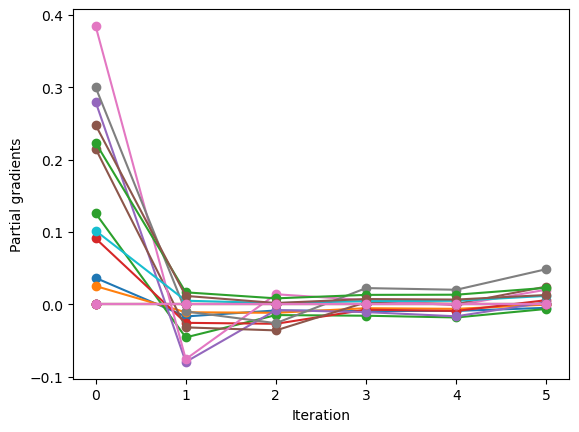

In [36]:
f = h5py.File(abvmc_file)
aa=f['pgrad'][...]
import matplotlib.pyplot as plt
plt.plot(aa, marker='o', label="etot")
plt.xlabel('Iteration')
plt.ylabel('Partial gradients')

In [175]:
# def get_variance(df, 
#                  discard = 10):
#     keys = df.keys()
#     numblocks = df[keys[0]].shape[0]
#     num_used_blocks = numblocks - discard
#     print('\t\t\t{:10s} {:6s} {:3s}'.format('Mean', 'Var', 'Ratio'))
#     for k in keys:
#         eb = df[k][discard:]
#         mean = np.mean(eb)
#         var = np.sqrt(1/(num_used_blocks - 1 ) * np.sum(eb**2 - mean**2))
#         print('{} \t {:.6f} \t {:.6f} {:.3f}'.format(k, mean, var, np.abs(var/mean)))

In [30]:
# get_variance(bosonrecipes.read_abvmc("bosonvmc.hdf5"),
#             discard=0)
# df2 = bosonrecipes.read_abvmc("bosonvmc.hdf5")
# df2
# plt.plot(df2['energytotal'], '-o', label='tot')
# # plt.plot(df2['energyei'], label='ei')
# # plt.plot(df2['energyee'], label='ee')
# # plt.plot(df2['energyke'], label='ke')
# # plt.plot(df2['energyvxc'], label='vxc')
# # plt.axhline(y=0, linestyle='dashed')
# plt.legend()

In [41]:
import importlib, recipes, bosonsamplemany, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools 
modules = [recipes,bosonsamplemany, bosonrecipes, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
    
for fname in ['bosonsjnoi.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION NO ION CUSP")
wf, df = bosonrecipes.ABOPTIMIZE(scf_checkfile, "bosonsjnoi.hdf5", max_iterations=24, nconfig=1000, verbose=True,
                                jastrow_kws={"ion_cusp":False}
                                )

# Jastrow optimization results
dfnoi = pyq.read_opt("bosonsjnoi.hdf5")
dfnoi



RUNNING ABVMC OPTIMIZATION NO ION CUSP
Number of determinants in the bosonic wavefunction= 1
Using spherical guess
starting warmup
finished warmup
-

/Users/ksu/Documents/GitHub/pyqmc2/pyqmc/pyqmc/boson_stochastic_reconfiguration.py:28: RuntimeWarning: divide by zero encountered in divide
  r = 1.0 / grad2
/Users/ksu/Documents/GitHub/pyqmc2/pyqmc/pyqmc/boson_stochastic_reconfiguration.py:35: RuntimeWarning: invalid value encountered in add
  f = a * r + b * r**2 + c * r**3


---------vmc done
descent en -1.0900746693842112 0.0010957341254640067  estimated sigma  0.3465015546438965
descent |grad| 0.13175222434287537
----------vmc done
descent en -1.0958830105314887 0.0010997377012980762  estimated sigma  0.34776759648598327
descent |grad| 0.0867516081791171
----------vmc done
descent en -1.10233751474828 0.0008834859005304685  estimated sigma  0.27938277263212435
descent |grad| 0.060197542903911744
----------vmc done
descent en -1.1068979475925533 0.0012637157431618644  estimated sigma  0.39962200634038453
descent |grad| 0.04408257675354828
----------vmc done
descent en -1.1105110414644976 0.0007386165120779486  estimated sigma  0.23357104955755847
descent |grad| 0.034604880806578586
----------vmc done
descent en -1.1125779223131962 0.0005965956982615144  estimated sigma  0.18866012487649422
descent |grad| 0.02907797065454639
----------vmc done
descent en -1.1164594587265113 0.0007965902612962418  estimated sigma  0.2519039587604798
descent |grad| 0.0250985

,energy,iteration,error,fname
0,-1.090075,0,0.001096,bosonsjnoi.hdf5
1,-1.095883,1,0.001100,bosonsjnoi.hdf5
2,-1.102338,2,0.000883,bosonsjnoi.hdf5
3,-1.106898,3,0.001264,bosonsjnoi.hdf5
4,-1.110511,4,0.000739,bosonsjnoi.hdf5
5,-1.112578,5,0.000597,bosonsjnoi.hdf5
6,-1.116459,6,0.000797,bosonsjnoi.hdf5
7,-1.118358,7,0.000477,bosonsjnoi.hdf5
8,-1.117915,8,0.000596,bosonsjnoi.hdf5
9,-1.120150,9,0.000633,bosonsjnoi.hdf5


keys ['configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'params', 'pgradient', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 0.24253188  0.24223779]
  [ 0.13472868  0.13286617]
  [-0.03283102 -0.03590994]
  [-0.02293318 -0.02583854]]

 [[ 0.24277621  0.24233325]
  [ 0.13389851  0.13339007]
  [-0.03384511 -0.03440812]
  [-0.02432184 -0.02415704]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.46887438  0.        ]
 [ 0.         -0.37807785  0.        ]
 [ 0.         -0.08888051  0.        ]]


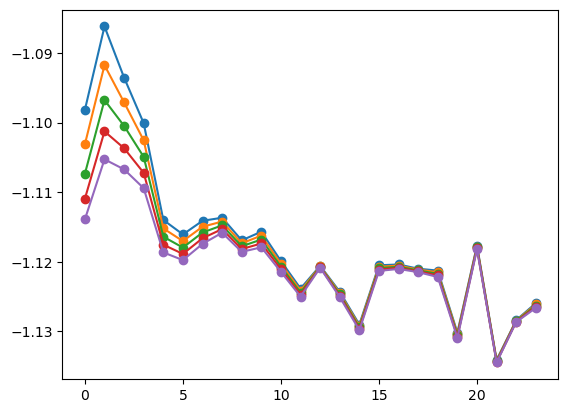

In [54]:
with h5py.File("bosonsjnoi.hdf5") as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    pgrad = f['pgradient'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


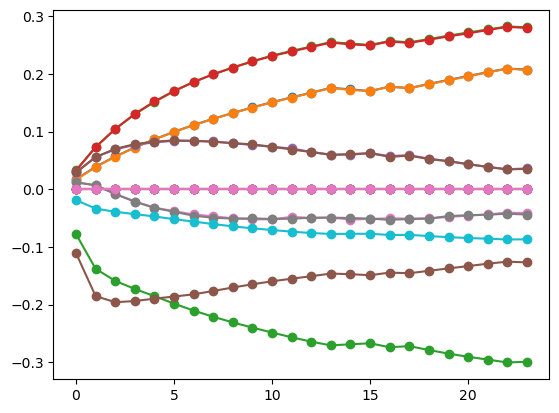

In [24]:
f = h5py.File("bosonsjnoi.hdf5")
aa=f['params'][...]
import matplotlib.pyplot as plt
plt.plot(aa, marker='o', label="etot")
plt.xlabel('Iteration')
plt.ylabel('Value of Jastrow parameters')

In [47]:
tstep = 0.1
nconfig = 100
nblocks = 300
nsteps_per_block = 4
discard = 10